<b><p style="font-size: XX-large"><font color = "orange">Andrew Cai</font></p></b> </div>
<b><p style="font-size: XX-large"><font color = "orange">Sentiment Analysis of Airline Reviews</font></p></b> </div>

-------------------------

# Data Set Background and Project Purpose

The dataset in this project contains over 20,000 data on airline reviews from airlinequality.com

The model building in this project consists of the following features the Kaggle dataset:

- Airline Name
- Overall Rating
- Review Title
- Verified (whether the review is verified or not)
- Review
- Aircraft
- Recommended

This project serves as a means to learn NLP modeling and using techniques such as VADER from NLTK and RoBERTA from Hugging Face to build models for sentiment analysis. Furthermore, I will then compare the two model performances.

[Airline Reviews](https://www.kaggle.com/datasets/juhibhojani/airline-reviews/data)

Airline Reviews (2023). Kaggle.

-------------------------

# Exploratory Data Analysis

## Package Imports and Setups

In [1]:
import warnings
# Suppress all warnings to clean up notebook
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot') # Set style for plots

## Airline Data

In [2]:
# Read in Airline Data
dfAir = pd.read_csv('Airline_review.csv')
dfAir.head(2)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no


In [3]:
# Exploring dataset metadata
dfAir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

## Feature Engineering

In [4]:
# Drop features that will not be explored in dataset due to NaN values 
dfAir2 = dfAir.drop(dfAir.columns[7:19], axis=1)
# Drop review date as it will not be explored either
dfAir2 = dfAir2.drop(dfAir2.columns[4], axis=1)
# Rename first column as Review_ID as this is the unique review identifier
dfAir2 = dfAir2.rename(columns={"Unnamed: 0": "Review_ID"})
dfAir2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_ID       23171 non-null  int64 
 1   Airline Name    23171 non-null  object
 2   Overall_Rating  23171 non-null  object
 3   Review_Title    23171 non-null  object
 4   Verified        23171 non-null  bool  
 5   Review          23171 non-null  object
 6   Recommended     23171 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 1.1+ MB


In [5]:
# Check for duplicates for unique key
dfAir2['Review_ID'].duplicated().value_counts()

Review_ID
False    23171
Name: count, dtype: int64

In [6]:
# Check why overall rating is not imported as integer
dfAir2['Overall_Rating'].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1193
4      859
n      842
5      830
6      675
Name: count, dtype: int64

In [7]:
# Removing rows with "n" in overall rating
dfAir2 = dfAir2[dfAir2['Overall_Rating'] != 'n']
dfAir2['Overall_Rating'].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1193
4      859
5      830
6      675
Name: count, dtype: int64

In [8]:
# Data type conversion Recommended to bool
dfAir2['Recommended'] = dfAir2['Recommended'].apply(lambda x: True if x == 'yes' else False)
# Convert overall rating to integer
dfAir2['Overall_Rating'] = dfAir2['Overall_Rating'].apply(pd.to_numeric)

In [9]:
dfAir2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22329 entries, 0 to 23170
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_ID       22329 non-null  int64 
 1   Airline Name    22329 non-null  object
 2   Overall_Rating  22329 non-null  int64 
 3   Review_Title    22329 non-null  object
 4   Verified        22329 non-null  bool  
 5   Review          22329 non-null  object
 6   Recommended     22329 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 1.1+ MB


## Plot of Count of Reviews vs Overall Rating

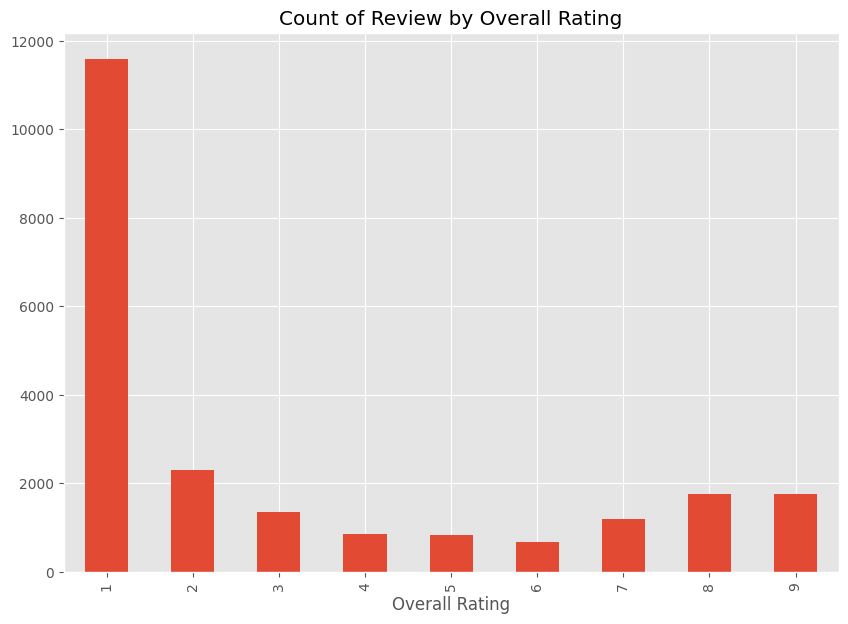

In [10]:
# Bar plot to display review counts
ax = dfAir2['Overall_Rating'].value_counts().sort_index().plot(kind='bar', 
                                                               title='Count of Review by Overall Rating',
                                                               figsize=(10,7))
ax.set_xlabel('Overall Rating');

Majority of the dataset seems to contain low rating for airlines in general.

-------------------------

# VADER Sentiment Scoring

## Package Imports and Model Setups

In [11]:
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # Progress bar tracker

sia = SentimentIntensityAnalyzer() # store model in a shortened variable name

## Model Processing and Output Extraction

### Review Sentiment

In [12]:
# Polarity Score on Entire Data Set for Review Sentiment
res = {} # Initialize an empty dictionary
for i, row in tqdm(dfAir2.iterrows(), total=len(dfAir2)):
    text = row['Review']
    id = row['Review_ID']
    # Store results into dictionary
    res[id] = sia.polarity_scores(text)

  0%|          | 0/22329 [00:00<?, ?it/s]

### Review Title Sentiment

In [13]:
# Polarity Score on Entire Data Set for Review Title Sentiment
res2 = {} # Initialize an empty dictionary
for i, row in tqdm(dfAir2.iterrows(), total=len(dfAir2)):
    text = row['Review_Title']
    id = row['Review_ID']
    # Store results into dictionary
    res2[id] = sia.polarity_scores(text)

  0%|          | 0/22329 [00:00<?, ?it/s]

### DataFame Processing

In [14]:
# Convert Review dictionary into df and transpose it for easier Pandas processing
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Review_ID'})
# Merge data set with main df
vaders = vaders.merge(dfAir2, how='left')
vaders.head()

,Review_ID,neg,neu,pos,compound,Airline Name,Overall_Rating,Review_Title,Verified,Review,Recommended
0,0,0.000,0.782,0.218,0.9192,AB Aviation,9,"""pretty decent airline""",True,Moroni to Moheli. Turned out to be a pretty ...,True
1,1,0.114,0.878,0.008,-0.9242,AB Aviation,1,"""Not a good airline""",True,Moroni to Anjouan. It is a very small airline...,False
2,2,0.031,0.849,0.121,0.7569,AB Aviation,1,"""flight was fortunately short""",True,Anjouan to Dzaoudzi. A very small airline an...,False
3,3,0.193,0.770,0.037,-0.9600,Adria Airways,1,"""I will never fly again with Adria""",False,Please do a favor yourself and do not fly wi...,False
4,4,0.079,0.846,0.074,-0.1416,Adria Airways,1,"""it ruined our last days of holidays""",True,Do not book a flight with this airline! My fr...,False


In [15]:
# Convert Review Title dictionary into df and transpose it for easier Pandas processing
vaders2 = vaders.rename(columns={"neg": "neg_review", "neu": "neu_review", "pos": "pos_review", "compound": "compound_review"})
res_title = pd.DataFrame(res2).T
res_title = res_title.reset_index().rename(columns={'index': 'Review_ID'})
# Merge data set with main df
vaders2 = vaders2.merge(res_title, how='left', on='Review_ID')
vaders2 = vaders2.rename(columns={"neg": "neg_title", "neu": "neu_title", "pos": "pos_title", "compound": "compound_title"})
vaders2.head()

,Review_ID,neg_review,neu_review,pos_review,compound_review,Airline Name,Overall_Rating,Review_Title,Verified,Review,Recommended,neg_title,neu_title,pos_title,compound_title
0,0,0.000,0.782,0.218,0.9192,AB Aviation,9,"""pretty decent airline""",True,Moroni to Moheli. Turned out to be a pretty ...,True,0.000,0.385,0.615,0.4939
1,1,0.114,0.878,0.008,-0.9242,AB Aviation,1,"""Not a good airline""",True,Moroni to Anjouan. It is a very small airline...,False,0.546,0.454,0.000,-0.3412
2,2,0.031,0.849,0.121,0.7569,AB Aviation,1,"""flight was fortunately short""",True,Anjouan to Dzaoudzi. A very small airline an...,False,0.000,1.000,0.000,0.0000
3,3,0.193,0.770,0.037,-0.9600,Adria Airways,1,"""I will never fly again with Adria""",False,Please do a favor yourself and do not fly wi...,False,0.000,1.000,0.000,0.0000
4,4,0.079,0.846,0.074,-0.1416,Adria Airways,1,"""it ruined our last days of holidays""",True,Do not book a flight with this airline! My fr...,False,0.290,0.467,0.243,-0.1280


## VADER Plots

### Compound Sentiment Score vs Airline Rating

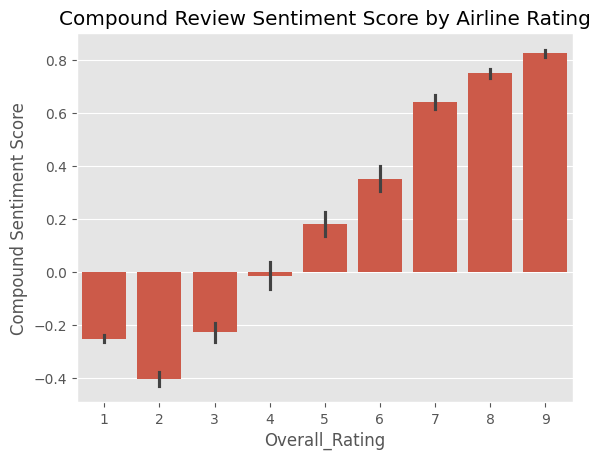

In [16]:
# Bar Plot showing VADER compounded sentiment of reviews
ax = sns.barplot(data=vaders, x='Overall_Rating', y='compound')
ax.set_title('Compound Review Sentiment Score by Airline Rating')
ax.set_ylabel('Overall Rating')
ax.set_ylabel('Compound Sentiment Score');

Trending seems to match expectation where overall sentiment has a direct relationship with overall rating

### VADERS Review Sentiment Bar Plots

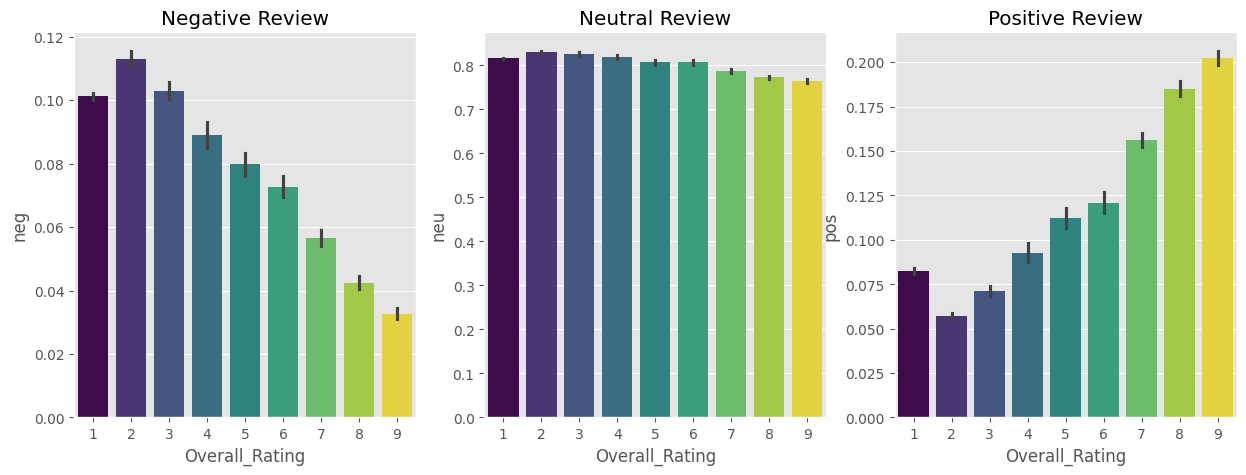

In [17]:
# Review Bar Plots
fig, axs = plt.subplots(1, 3, figsize=(15,5))
# Plot VADER Negative, Neutral, and Positive Sentiment Probabilities
sns.barplot(data=vaders, x='Overall_Rating', y='neg', ax=axs[0], hue='Overall_Rating', palette='viridis')
sns.barplot(data=vaders, x='Overall_Rating', y='neu', ax=axs[1], hue='Overall_Rating', palette='viridis')
sns.barplot(data=vaders, x='Overall_Rating', y='pos', ax=axs[2], hue='Overall_Rating', palette='viridis')
axs[0].set_title('Negative Review')
axs[0].legend_.remove()
axs[1].set_title('Neutral Review')
axs[1].legend_.remove()
axs[2].set_title('Positive Review')
axs[2].legend_.remove()

From the plot, this matches the expectation trends where the the postive and negative follow the overall rating scores. Negative review sentiment demonstrates an inverse relationship with overall rating and Positive review sentiment demonstrates a direct relationship with overall rating.

### VADERS Review Title Sentiment Bar Plots

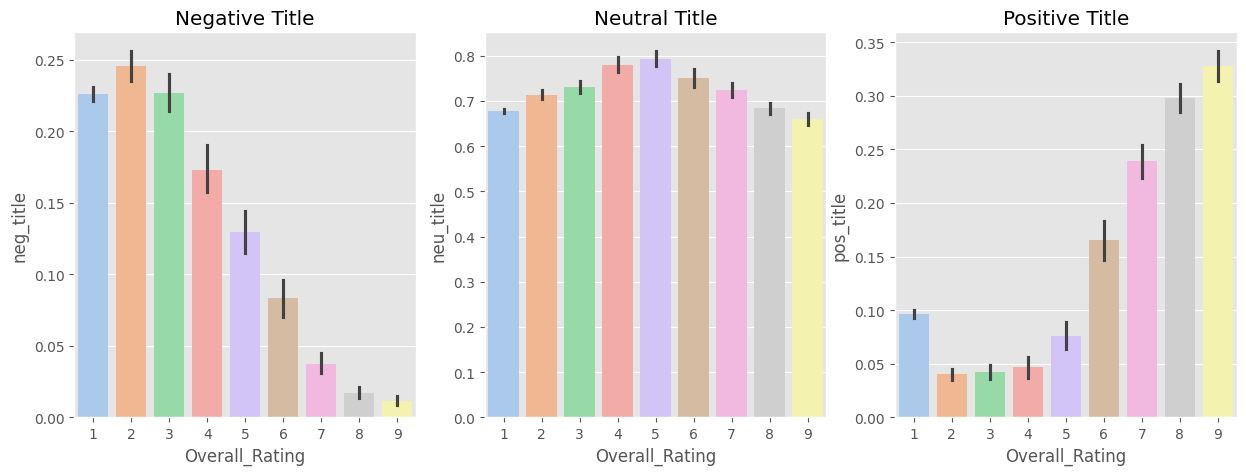

In [18]:
# Titles Bar Plots
fig2, axs2 = plt.subplots(1, 3, figsize=(15,5))
# Plot VADER Negative, Neutral, and Positive Sentiment Probabilities
sns.barplot(data=vaders2, x='Overall_Rating', y='neg_title', ax=axs2[0], hue='Overall_Rating', palette='pastel')
sns.barplot(data=vaders2, x='Overall_Rating', y='neu_title', ax=axs2[1], hue='Overall_Rating', palette='pastel')
sns.barplot(data=vaders2, x='Overall_Rating', y='pos_title', ax=axs2[2], hue='Overall_Rating', palette='pastel')
axs2[0].set_title('Negative Title')
axs2[0].legend_.remove()
axs2[1].set_title('Neutral Title')
axs2[1].legend_.remove()
axs2[2].set_title('Positive Title')
axs2[2].legend_.remove()

From the plot, this matches the expectation trends where the the postive and negative follow the overall rating scores. Negative title sentiment demonstrates an inverse relationship with overall rating and Positive title sentiment demonstrates a direct relationship with overall rating.

-------------------------

# RoBERTa Pretrained Model

## Package Imports and Model Setups

In [19]:
# Hugging Face transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import pipeline
import torch

# Use GPU identifcation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Pre-Trained Hugging Face Model Used
mod = f"cardiffnlp/twitter-roberta-base-sentiment"
# Tokenizer Setup
tokenizer = AutoTokenizer.from_pretrained(mod)
# Sequence Classication Setup
model = AutoModelForSequenceClassification.from_pretrained(mod)
model.to(device) # Use GPU instead of CPU
# Pipeline setup
pipe = pipeline("sentiment-analysis", 
                model=model, 
                tokenizer=tokenizer, 
                return_all_scores=True,
                device=0 if torch.cuda.is_available() else -1 
                ) # Use GPU if available, else CPU

## RoBERTa Function

In [20]:
# Check token counts if they exceed model for summarizer (1024)
token_count = [len(tokenizer(dfAir2['Review'].iloc[i])['input_ids']) for i in range(len(dfAir2['Review']))]
token_count[token_count.index(max(token_count))]

1523

In [21]:
def polarity_scores_roberta(row):
    """Generate sentiment (polarity) scores based on text

    Args:
        row (str): a body of text

    Returns:
        dict: a dictionary of labeled polarity scores
    """
    # rename labels
    label_mapping = {
        'LABEL_0': 'roberta_neg',
        'LABEL_1': 'roberta_neu',
        'LABEL_2': 'roberta_pos'
        }
    # Summarizer model to condense text
    if 512 < len(tokenizer(row)['input_ids']) < 1024:
        # Need to condense tokens else model will not work for summarizer (1024 max)
        summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
        # Reduce tokens down to 512 for also RoBERTa model
        summary = summarizer(row, max_length=512, min_length=30, do_sample=False)[0]['summary_text']
        resultsummary = pipe(summary)
        mapped_result = {label_mapping[item['label']]: item['score'] for item in resultsummary[0]}
    elif len(tokenizer(row)['input_ids']) < 512:
        # Normal processing if tokens are less than 512
        result = pipe(row)
        mapped_result = {label_mapping[item['label']]: item['score'] for item in result[0]}
    else:
        # if token counts exceed 1024 then skip row modeling
        mapped_result = None
    return mapped_result

## Run and Save Model

In [22]:
res3 = {} # Initialize empty dictionary
# Run Model with Error Handling
for i in tqdm(range(len(dfAir2)), desc="Processing Reviews"):
    try:
        res3[dfAir2['Review_ID'].iloc[i]] = polarity_scores_roberta(dfAir2['Review'].iloc[i])
    except RuntimeError as error: 
        print(f"Broke for Review_ID: {i} due to {error}")

In [23]:
# Convert to a process df
roberta = pd.DataFrame(res3).T
roberta = roberta.reset_index().rename(columns={'index': 'Review_ID'})
# Save new model
roberta.to_csv('RoBERTa - AR.csv', index=False)

In [24]:
# Load in model results
roberta = pd.read_csv('RoBERTa - AR.csv')
roberta

,Review_ID,roberta_neg,roberta_neu,roberta_pos
0,0,0.004333,0.034115,0.961552
1,1,0.517258,0.403512,0.079230
2,2,0.006310,0.047345,0.946345
3,3,0.964133,0.032120,0.003747
4,4,0.909172,0.081805,0.009023
...,...,...,...,...
22324,23166,0.945162,0.049316,0.005522
22325,23167,0.907590,0.083835,0.008575
22326,23168,0.717701,0.257908,0.024392
22327,23169,0.800611,0.177121,0.022268


## Merging Data

In [25]:
# Merge data with main df
dfAir3 = dfAir2.merge(roberta, how='left', on='Review_ID')
dfAir3.sample(5)

,Review_ID,Airline Name,Overall_Rating,Review_Title,Verified,Review,Recommended,roberta_neg,roberta_neu,roberta_pos
12356,12808,Kenya Airways,5,"""flight was suddenly canceled twice""",True,It's hard for me to write a review because I...,False,0.518133,0.360293,0.121575
19959,20724,Tigerair Australia,1,"""Our flight was cancelled""",True,Sydney to Gold Coast. I was severely disappo...,False,0.960347,0.035470,0.004184
17527,18220,Singapore Airlines,1,"""by far the worst customer service""",False,Singapore Airlines still has not reimbursed m...,False,0.945055,0.049444,0.005501
13377,13913,Lion Air,1,"""Cheap but not have good quality""",True,Jakarta to Kuala Lumpur. I know from the sta...,False,0.873432,0.112611,0.013957
1275,1338,Air Canada rouge,7,"""flight was perfectly adequate""",False,Toronto to Manchester. Unfortunately delayed...,True,0.166706,0.359248,0.474046


In [26]:
# Drop rows that exceeded token limit (no sentiment ran)
dfAir3 = dfAir3.dropna()
dfAir3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22323 entries, 0 to 22328
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_ID       22323 non-null  int64  
 1   Airline Name    22323 non-null  object 
 2   Overall_Rating  22323 non-null  int64  
 3   Review_Title    22323 non-null  object 
 4   Verified        22323 non-null  bool   
 5   Review          22323 non-null  object 
 6   Recommended     22323 non-null  bool   
 7   roberta_neg     22323 non-null  float64
 8   roberta_neu     22323 non-null  float64
 9   roberta_pos     22323 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


## RoBERTa Plots

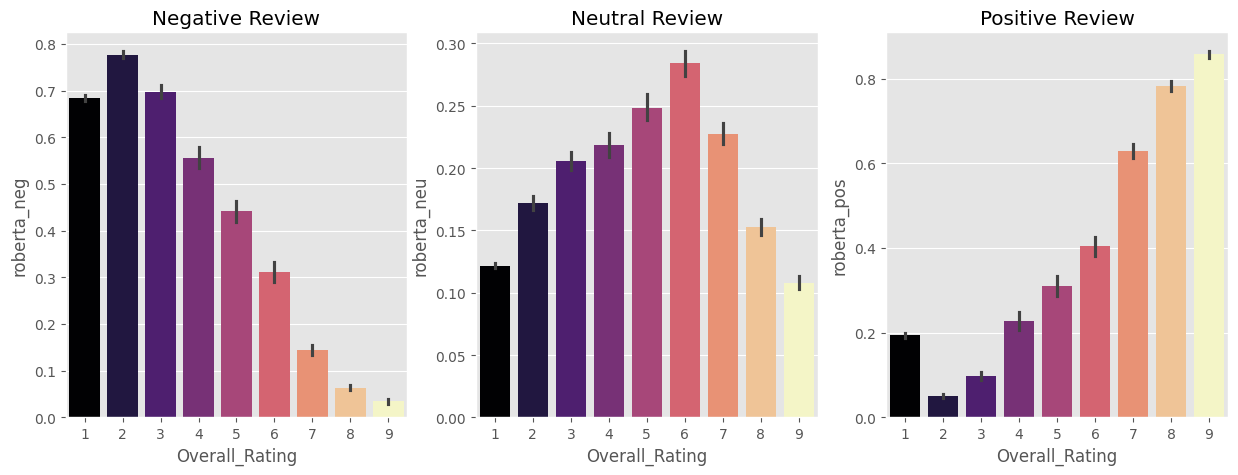

In [27]:
fig3, axs3 = plt.subplots(1, 3, figsize=(15,5))
# Plot RoBERTa Negative, Neutral, and Positive Sentiment Probabilities
sns.barplot(data=dfAir3, x='Overall_Rating', y='roberta_neg', ax=axs3[0], hue='Overall_Rating', palette='magma')
sns.barplot(data=dfAir3, x='Overall_Rating', y='roberta_neu', ax=axs3[1], hue='Overall_Rating', palette='magma')
sns.barplot(data=dfAir3, x='Overall_Rating', y='roberta_pos', ax=axs3[2], hue='Overall_Rating', palette='magma')
axs3[0].set_title('Negative Review')
axs3[0].legend_.remove()
axs3[1].set_title('Neutral Review')
axs3[1].legend_.remove()
axs3[2].set_title('Positive Review')
axs3[2].legend_.remove()

From the plot, this matches the expectation trends where the the postive and negative follow the overall rating scores. Negative sentiment demonstrates an inverse relationship with overall rating and Positive sentiment demonstrates a direct relationship with overall rating.

-------------------------

# Compare Models

## DataFrame Processing

In [28]:
# Extract and Rename relevant VADER columns
vader_com = vaders2[['Review_ID', 
                     'neg_review', 
                     'neu_review', 
                     'pos_review']]
vader_com = vader_com.rename(columns={"neg_review": "vader_neg", "neu_review": "vader_neu", "pos_review": "vader_pos"})
vader_com.sample(5)

,Review_ID,vader_neg,vader_neu,vader_pos
914,962,0.000,0.719,0.281
15738,16372,0.102,0.848,0.050
10863,11226,0.096,0.866,0.038
3177,3334,0.117,0.883,0.000
16360,17015,0.018,0.714,0.268


In [29]:
# Merge VADER, RoBERTa, and relevant dataset features
dfAir_Models = dfAir3.merge(vader_com, how='left', on='Review_ID')
# No need for Review Title
dfAir_Models = dfAir_Models.drop(dfAir_Models.columns[3], axis=1)
dfAir_Models.sample(5)

,Review_ID,Airline Name,Overall_Rating,Verified,Review,Recommended,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos
3874,4047,Allegiant Air,1,True,"Horrible experience, I flew with my wife and...",False,0.956610,0.038853,0.004537,0.134,0.832,0.034
14045,14618,Manta Air,9,True,"Small Domestic Terminal in Male, Fast and ef...",True,0.003234,0.125850,0.870916,0.036,0.696,0.269
4474,4666,Asiana Airlines,2,False,Avoid Asiana's Honolulu-Incheon route. Super...,False,0.531486,0.334369,0.134145,0.081,0.722,0.197
14576,15190,Norse Atlantic Airways,1,True,"The crew were very nice and helpful, they we...",True,0.001607,0.005693,0.992700,0.000,0.486,0.514
11577,11993,Jet Airways,7,True,Delhi to Jaipur with Jet Airways. Impressive ...,True,0.002468,0.031342,0.966190,0.000,0.814,0.186


In [30]:
# Checking metadata to ensure all have same non-null counts
dfAir_Models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22323 entries, 0 to 22322
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_ID       22323 non-null  int64  
 1   Airline Name    22323 non-null  object 
 2   Overall_Rating  22323 non-null  int64  
 3   Verified        22323 non-null  bool   
 4   Review          22323 non-null  object 
 5   Recommended     22323 non-null  bool   
 6   roberta_neg     22323 non-null  float64
 7   roberta_neu     22323 non-null  float64
 8   roberta_pos     22323 non-null  float64
 9   vader_neg       22323 non-null  float64
 10  vader_neu       22323 non-null  float64
 11  vader_pos       22323 non-null  float64
dtypes: bool(2), float64(6), int64(2), object(2)
memory usage: 1.7+ MB


## Pairplot Between RoBERTa and VADER Sentiment Analyses

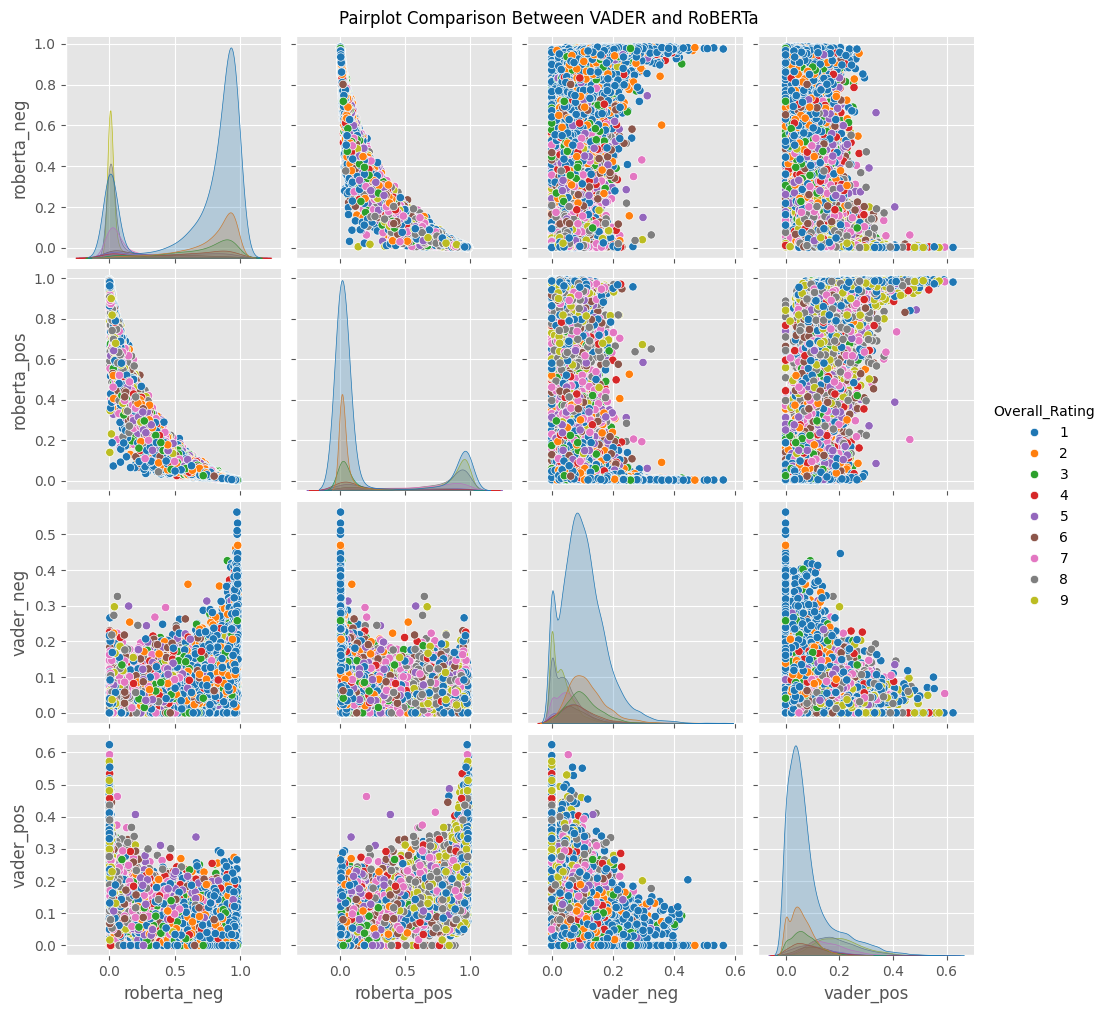

In [31]:
# Pairplot
g = sns.pairplot(data=dfAir_Models, 
                 vars=['roberta_neg', 'roberta_pos', 'vader_neg', 'vader_pos'],
                 hue = 'Overall_Rating',
                 palette='tab10')
g.figure.suptitle('Pairplot Comparison Between VADER and RoBERTa', y=1.01);

From the KDE plots VADER is less confident in separating the sentiment as one can see the overlaps of the Overall_Rating in the KDE plots. However, in the Roberta Positive and Negative KDE plots, there are distinct separate peaks to separate the sentiment.

## Query Insights

In [32]:
# Low rating, but positive sentiment: RoBERTa
dfAir_Models.query('Overall_Rating == 1').sort_values('roberta_pos', ascending=False)['Review'].values[0]

' My flight was really so amazing from Stockholm Arlanda to Doha. The crew of that flight are very friendly and very kind. They really did an excellent job; the food was also very delicious! Thank you for preparing the food! I hope to see them again on my next Finnair flight!'

In [33]:
# Low rating, but positive sentiment: VADER
dfAir_Models.query('Overall_Rating == 1').sort_values('vader_pos', ascending=False)['Review'].values[0]

'  Kuala Lumpur to Milan via Jeddah. Great airline, such amazing food and really nice staff.  Like the food is amazing. Comfortable seats, good entertainment.'

In [34]:
# High rating, but negative sentiment: RoBERTa
dfAir_Models.query('Overall_Rating == 9').sort_values('roberta_neg', ascending=False)['Review'].values[0]

'  Worst experience ever. Coordination between ground staff and cabin staff is zero. My flight was planned to departure at 2215hrs right now im sitting inside the flight for almost one hour and did not even got a cup of water. Keep Air India as your last option. '

In [35]:
# High rating, but negative sentiment: VADER
dfAir_Models.query('Overall_Rating == 9').sort_values('vader_neg', ascending=False)['Review'].values[0]

'  Stansted to Naples. Another return trip with Jet2.com. Pretty punctual, friendly crew and slightly uncomfortable seating. Nothing special to report, no complaints.'

From some of the queries above, the low rating with seemingly positive sentiments could have been due to user error on the rating system for both models. For high rating reviews and negative sentiment, RoBERTA seems to detect that the user perhaps intended a lower overall rating. VADER, on the other hand, seems to have misread the sentiment since the review contextually seems positive and the user gave a high positive rating.

-------------------------

# Conclusion

Both the RoBERTa and VADER models has provided sentiment scoring to the airline reviews dataset. Based on initial analyses both models performed well in tracking positive and negative sentiments scaling with overall rating. However, when comparing the two models, RoBERTa seems to perform better in distinctly separating the sentiment in overalo ratings as seen in the peaks in the KDE plots. Furthermore, RoBERTa seems to better detect user sentiment and correctly identifying user intent for review ratings such as the review was negative and the user most likely meant to give the airline a lower rating. However, VADER gave a high negative sentiment to a overall positive experience.

To improve the performance/accuracy of the modeling, alternative summarizers could be used to better capture the context of reviews and also use batch processing. This project used sequential processing in the pipeline due to hardware configurations.